Проект представляє реалізацію рішення змагання на платформі Kaggle за допомогою використання дерев прийняття рішень.
Посилання на змагання, в якому я приймала участь : https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/submissions

**Дані** : https://drive.google.com/drive/folders/1p-exIreXR2HkSW8hFvUpaJBuviMJxYnp?usp=sharing

**Завдання**: передбачити, чи продовжить клієнт користуватися своїм рахунком у банку, чи закриє його.

**Оцінка якості моделі**:  оцінюється за площею під ROC-кривою між передбаченою ймовірністю та спостережуваною ціллю.

**Інформація про датасет** : набір даних про відтік клієнтів банку,він містить інформацію про клієнтів банку, які або залишили банк, або продовжують бути клієнтами. Набір даних включає наступні атрибути:

**ID**: Унікальний ідентифікатор рядка

**Customer ID**: Унікальний ідентифікатор для кожного клієнта (це поле містить дублікати для різної інформації клієнтів, тому його просто видаляємо)

**Surname**: Прізвище клієнта

**Credit Score**: Числове значення, що представляє кредитний рейтинг клієнта

**Geography**: Країна, де проживає клієнт (Франція, Іспанія або Німеччина)

**Gender**: Стать клієнта (Чоловік або Жінка)

**Age**: Вік клієнта

**Tenure**: Кількість років, які клієнт обслуговується в банку

**Balance**: Баланс рахунку клієнта

**NumOfProducts**: Кількість банківських продуктів, які використовує клієнт (наприклад, ощадний рахунок, кредитна картка)

**HasCrCard**: Чи має клієнт кредитну картку (1 = так, 0 = ні)

**IsActiveMember**: Чи є клієнт активним членом (1 = так, 0 = ні)

**EstimatedSalary**: Оціночна зарплата клієнта

**Exited**: Чи залишив клієнт банк (1 = так, 0 = ні)

**Крок 1.**

Для початку створюємо модуль для попередньої обробки сирих даних `process_bank_churn.py` в якому використаємо функцію `preprocess_data(...). Ця функція виконує наступні кроки:

- Розділення Даних: Розділяє вхідний набір даних на тренувальний та валідаційний набори. Це робиться за допомогою функції split_train_val, яка стратифікує дані згідно з цільовим стовпчиком (у вашому випадку, 'Exited') для забезпечення рівного розподілу в обох наборах.

- Визначення Вхідних і Цільових Змінних: Функція розділяє входи (признаки, котрі будуть використані для навчання моделі) і цілі (значення, які потрібно передбачити) за допомогою функції separate_inputs_targets.

- Визначення Чисельних і Категоріальних Змінних: Ідентифікує які стовпчики в тренувальних даних є чисельними, а які категоріальними.

- Масштабування Чисельних Змінних: Якщо використовується масштабування чисельних змінних, функція застосовує MinMaxScaler для нормалізації чисельних даних у тренувальному та валідаційному наборах.

- Кодування Категоріальних Змінних: Застосовує OneHotEncoder для перетворення категоріальних змінних на бінарні змінні, що полегшує обробку моделлю машинного навчання.

- Підготовка Кінцевих Даних: Об'єднує оброблені вхідні дані та цільові дані для тренувальних і валідаційних наборів та повертає їх разом із списком вхідних колонок, об'єктом для масштабування та об'єктом для кодування.

Ця функція створена для того, щоб автоматизувати процес підготовки даних до моделювання





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Посилання : https://github.com/mariia-honcharenko/python_for_DS_tasks.git

In [ ]:
!git clone https://github.com/mariia-honcharenko/python_for_DS_tasks.git

Cloning into 'python_for_DS_tasks'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 139 (delta 15), reused 4 (delta 4), pack-reused 121 (from 1)
Receiving objects: 100% (139/139), 7.81 MiB | 18.34 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
!pip install pyarrow --quiet
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
import sys
sys.path.append('/content/python_for_DS_tasks')

In [ ]:
from process_bank_churn import preprocess_data

**Крок 2.**
1. Тренуємо дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виводимо area under ROC для моделі на тренувальних і тестувальних даних.
3. Виведимо глибину дерева.
4. Будуємо дерево до глибини 2 включно.
5. Створюємо датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведимо топ 10 найвпливовіших ознак разом з їх скором важливості

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/Data Science/train.csv', index_col=0)

In [ ]:
train_inputs, train_targets, val_inputs, val_targets, input_cols, scaler, encoder = preprocess_data(raw_df, scale_numeric=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score

train_preds = model.predict_proba(train_inputs)[:, 1]

val_preds = model.predict_proba(val_inputs)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

print(f'Train AUC: {train_auc}')
print(f'Validation AUC: {val_auc}')



Train AUC: 1.0
Validation AUC: 0.7699533575691063


**Висновок**: спостерігаємо перенавчання моделі.

In [ ]:
model.tree_.max_depth

26

In [ ]:
tree_text = export_text(model, max_depth=2, feature_names=list(train_inputs.columns))
print(tree_text[:5000])

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- Age <= 39.50
|   |   |   |--- truncated branch of depth 24
|   |   |--- Age >  39.50
|   |   |   |--- truncated branch of depth 18
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 16
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 17
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1.0



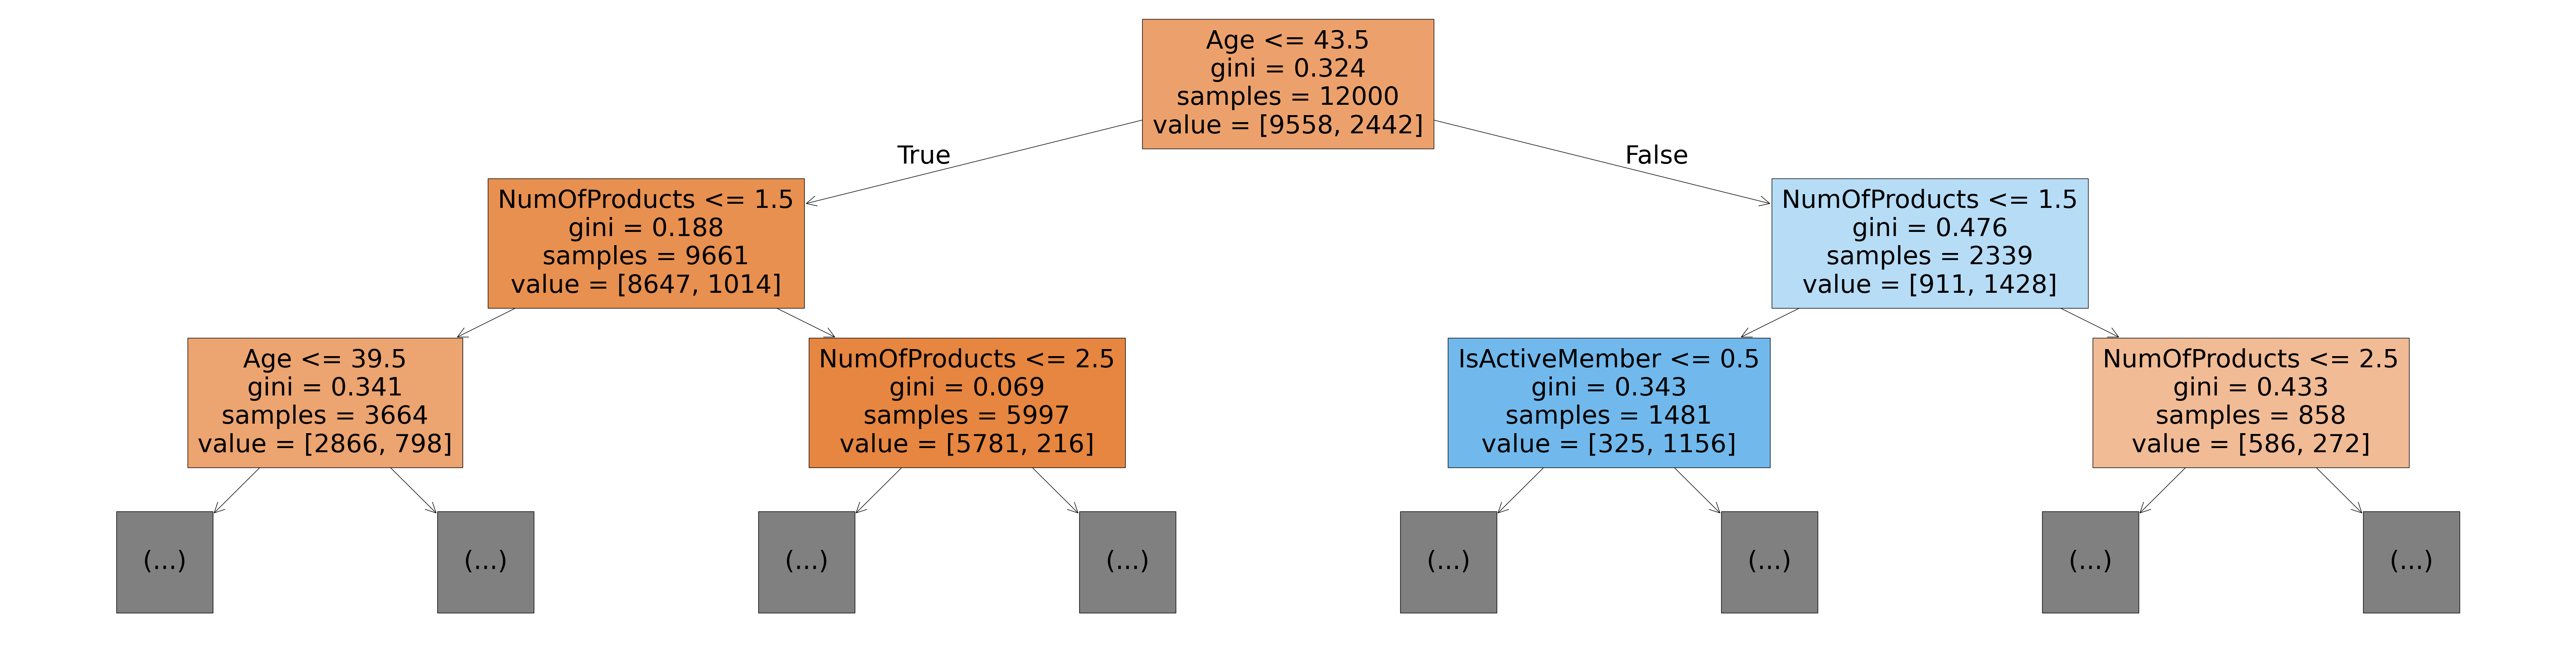

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_inputs.columns, max_depth=2, filled=True);

**Висновок:** Найвпливовішими ознаками є  - Age, NumOfProducts, IsActiveMember.

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


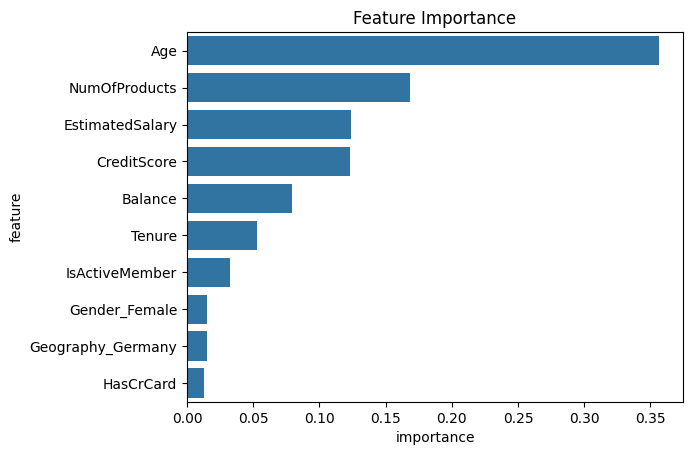

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Крок 3.**
Спробуємо знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці).
Експериментуємо з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишаємо ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.



In [ ]:
model_2 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
model_2.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
train_preds = model_2.predict_proba(train_inputs)[:, 1]
val_preds = model_2.predict_proba(val_inputs)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

print(f'Train AUC: {train_auc}')
print(f'Validation AUC: {val_auc}')

Train AUC: 0.9337778113672652
Validation AUC: 0.9211108443651829


In [ ]:
model_3 = DecisionTreeClassifier(max_leaf_nodes=50, random_state=42)
model_3.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_leaf_nodes=50, random_state=42)

In [ ]:
train_preds = model_3.predict_proba(train_inputs)[:, 1]
val_preds = model_3.predict_proba(val_inputs)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

print(f'Train AUC: {train_auc}')
print(f'Validation AUC: {val_auc}')

Train AUC: 0.9311900498341176
Validation AUC: 0.9235341930173537


**Крок 4**. В циклі проходимось по значенням max_depth від 1 до 20 включно, на кожній ітерації тренуємо DecisionTree модель і виміряємо AUROC на трейн і валідаційних даних.

В кінці виведимо на графік залежність між AUROC на трейн і валідаційних даних і номером ітерації.

In [ ]:
def max_depth_auroc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_targets)

    train_preds = model.predict_proba(train_inputs)[:, 1]
    val_preds = model.predict_proba(val_inputs)[:, 1]

    train_auc = roc_auc_score(train_targets, train_preds)
    val_auc = roc_auc_score(val_targets, val_preds)

    return {'Max Depth': md, 'Train AUC': train_auc, 'Validation AUC': val_auc}


results = []
for md in range(1, 21):
    result = max_depth_auroc(md)
    results.append(result)
    print(result)

# Найкращий результат
best_result = max(results, key=lambda x: x['Validation AUC'])
print(f"\nBest Result: {best_result}")


{'Max Depth': 1, 'Train AUC': 0.7447268789076699, 'Validation AUC': 0.7348652170930791}
{'Max Depth': 2, 'Train AUC': 0.8429075368811715, 'Validation AUC': 0.8464963303381576}
{'Max Depth': 3, 'Train AUC': 0.8971842069770506, 'Validation AUC': 0.8911458261883531}
{'Max Depth': 4, 'Train AUC': 0.911281487788079, 'Validation AUC': 0.9112638041017903}
{'Max Depth': 5, 'Train AUC': 0.9256944626530315, 'Validation AUC': 0.9219267439467729}
{'Max Depth': 6, 'Train AUC': 0.9337778113672652, 'Validation AUC': 0.9211108443651829}
{'Max Depth': 7, 'Train AUC': 0.9415346694066091, 'Validation AUC': 0.9144488648055422}
{'Max Depth': 8, 'Train AUC': 0.9495410921964594, 'Validation AUC': 0.9027899718773579}
{'Max Depth': 9, 'Train AUC': 0.9590791356328079, 'Validation AUC': 0.8847088277659648}
{'Max Depth': 10, 'Train AUC': 0.969764555687343, 'Validation AUC': 0.8484361067288566}
{'Max Depth': 11, 'Train AUC': 0.9780444500312675, 'Validation AUC': 0.8411365662939845}
{'Max Depth': 12, 'Train AUC': 0

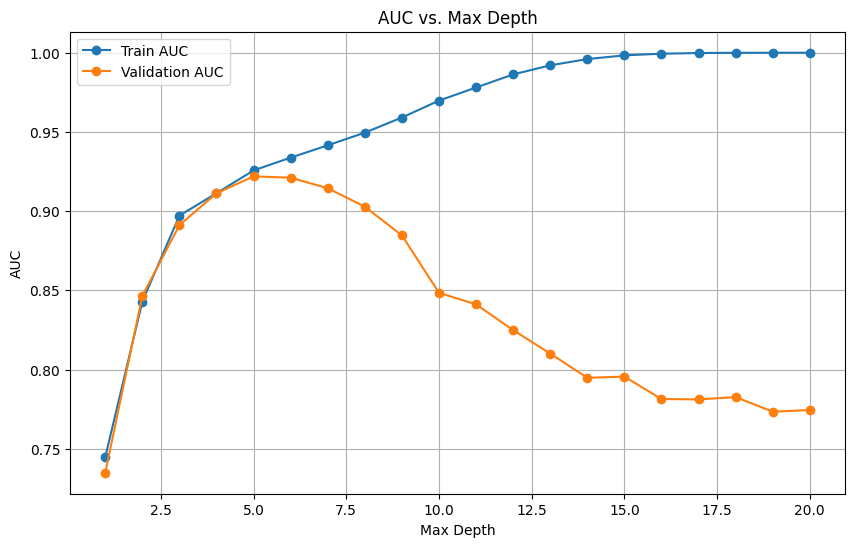

In [ ]:
train_auc_list = [result['Train AUC'] for result in results]
val_auc_list = [result['Validation AUC'] for result in results]
depth_list = [result['Max Depth'] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(depth_list, train_auc_list, label='Train AUC', marker='o')
plt.plot(depth_list, val_auc_list, label='Validation AUC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.title('AUC vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

**Оптимальна глибина з точки зору якості моделі (найвища Validation Error) - 5.**

**Крок  5**.
1. Натренуємо модель `DecisionTree` з найкращим значенням `max_depth`, яке я знайшла на попередній ітерації.
2. Завантажуємо тестові дані змагання з `test.csv`.
3. Зробимо попередню обробку даних з функцією `preprocess_new_data` з модуля `process_bank_churn.py`.
4. Зробимо передбачення використовуючи цю модель на тестових даних змагання.



In [ ]:
best_model = DecisionTreeClassifier(max_depth=6, random_state=42)
best_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
from process_bank_churn import preprocess_new_data

In [ ]:
test_raw_df = pd.read_csv('/content/drive/MyDrive/Data Science/test.csv')
test_raw_df = test_raw_df.drop(columns=['id'])

In [ ]:
preprocessed_test = preprocess_new_data(test_raw_df, input_cols, scaler, encoder, scale_numeric=False)

In [ ]:
preprocessed_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
3,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
4,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0


In [ ]:
test_preds = best_model.predict_proba(preprocessed_test)[:, 1]


In [ ]:
submission_df = pd.DataFrame({'Id': test_raw_df.index, 'Exited': test_preds})

In [ ]:
sample_submission_df=pd.read_csv('/content/drive/MyDrive/Data Science/sample_submission.csv')

In [ ]:
sample_submission_df['Exited']=submission_df['Exited']

In [ ]:
sample_submission_df.to_csv('submission_trees.csv', index=False)

**Результат**: отримали досить високий показник AUC score, модель має дуже хорошу дискримінаційну здатність і є досить ефективною у розрізненні між двома класами. Цей показник вказує на високу якість моделі, з таким показником AUC, можна розглядати модель як достатньо надійну для застосування в реальних умовах.

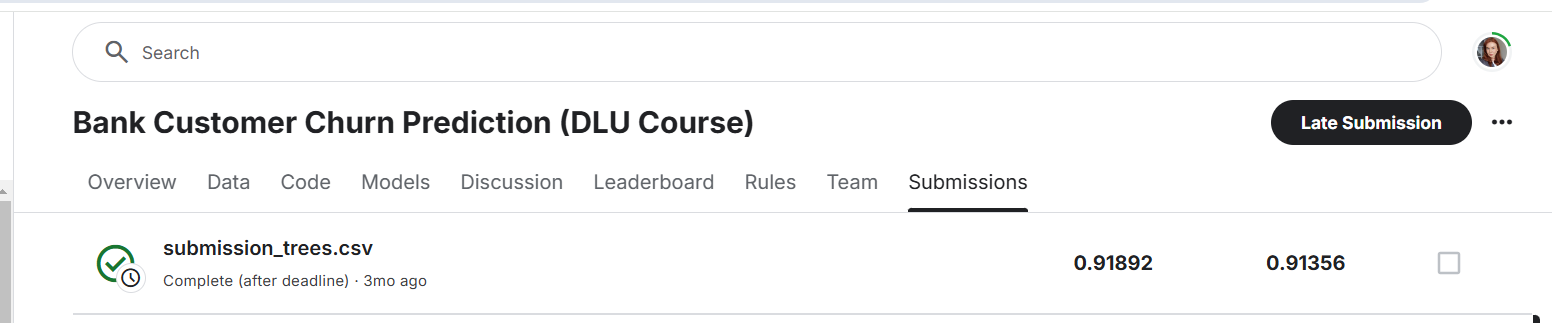